In [1]:
import pandas as pd

In [6]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [7]:
data.shape

(200, 4)

In [14]:
import seaborn as sns
% matplotlib inline

/Users/hs3m/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


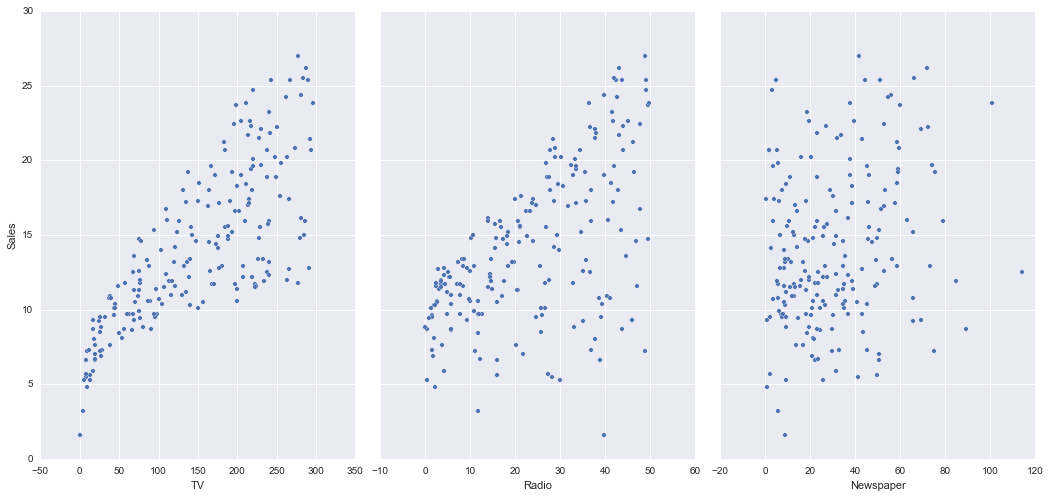

In [18]:
sns.pairplot(data, x_vars= ['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7)

/Users/hs3m/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


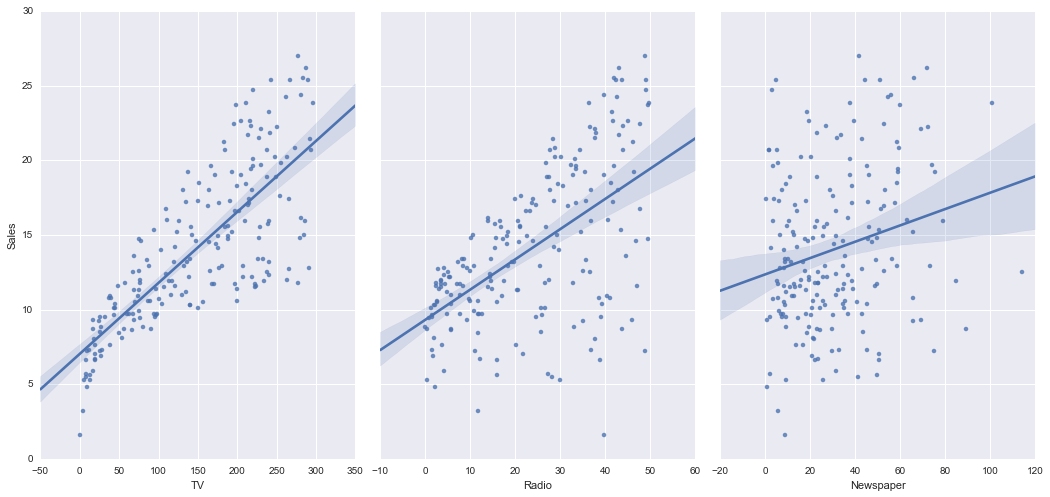

In [19]:
sns.pairplot(data, x_vars= ['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [20]:
features_col = ['TV', 'Radio', 'Newspaper']

X = data[features_col] # or X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [23]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [27]:
y = data['Sales'] # or y = data.sales
y.head()


1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [28]:
print(y.shape)

(200,)


In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(150, 3)
(50, 3)
(150,)
(50,)


In [33]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [36]:
list(zip(features_col, linreg.coef_))

[('TV', 0.046564567874150267),
 ('Radio', 0.17915812245088833),
 ('Newspaper', 0.0034504647111804365)]

In [46]:
y_pred = linreg.predict(X_test)

In [39]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

print((10+0+20+10)/4)

from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [41]:
print((10**2 +0**2 +20**2 +10**2)/4)

print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [44]:
import numpy as np
print(np.sqrt((10**2 +0**2 +20**2 +10**2)/4))

print(np.sqrt(metrics.mean_squared_error(true, pred)))
# RSME

12.2474487139
12.2474487139


In [50]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


In [51]:
X = data[['TV', 'Radio']]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994
